# Sequential Load forecasting with Timeseries transformer model

#Setup

In [1]:
import scipy.io as sio
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import random
from keras.layers import Dense
from keras.layers import GRU
from tensorflow.python.keras import backend as K
from keras.layers import Dropout, Add
import os
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
import math
random.seed(322)

C:\Users\Shahzeb\anaconda3\envs\Modulestesting7\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shahzeb\anaconda3\envs\Modulestesting7\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shahzeb\anaconda3\envs\Modulestesting7\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Shahzeb\anaconda3\envs\Modul

# Steel Industry Energy Consumption Dataset
The dataset contains attributes related to lagging and leading current reactive power, the lagging and leading current power factor, carbon dioxide emissions, and load types. Timespan - 1year (365 days)
# https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset#

In [2]:
df = pd.read_csv('Steel_industry_data.csv')
display(df)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


# Correlation analysis for feature selection
# Feature withh Pearson correlation coefficient higher than 0.5 are selected as inputs.

In [3]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


# Correlation analysis for feature selection
# Feature withh Pearson correlation coefficient higher than 0.5 are selected as inputs.

In [4]:
columns_to_use = ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','CO2(tCO2)']
df = df[columns_to_use]
display(df)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2)
0,3.17,2.95,0.0
1,4.00,4.46,0.0
2,3.24,3.28,0.0
3,3.31,3.56,0.0
4,3.82,4.50,0.0
...,...,...,...
35035,3.85,4.86,0.0
35036,3.74,3.74,0.0
35037,3.78,3.17,0.0
35038,3.78,3.06,0.0


Top 10 of Dataframe:    Usage_kWh  Lagging_Current_Reactive.Power_kVarh  CO2(tCO2)
0   0.020168                              0.030441        0.0
1   0.025449                              0.046022        0.0
2   0.020613                              0.033846        0.0
3   0.021059                              0.036735        0.0
4   0.024303                              0.046435        0.0
5   0.020868                              0.036735        0.0
6   0.022904                              0.042720        0.0
7   0.022904                              0.044165        0.0
8   0.020868                              0.037561        0.0
9   0.024049                              0.048705        0.0
Maximum: Usage_kWh                               157.18
Lagging_Current_Reactive.Power_kVarh     96.91
CO2(tCO2)                                 0.07
dtype: float64


In [17]:
#Plot Output variable
%matplotlib qt5
plt.figure(figsize=(5, 5))
plt.plot(df['Usage_kWh'], 'k-', label='Us')
plt.xlabel('Samples (15 min)', fontsize=12)
plt.ylabel('Load (kWh)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()


In [ ]:
#Data Normalization

max = df.max()
df = (df / df.max())
print('Top 10 of Dataframe:', df.head(10))
print('Maximum:', max)

# Transform data into past and future sequences using a sliding window.

In [5]:
#Sliding window parameters and function
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

past_datapoints = 8
future_datapoints = 4

In [6]:
#Using first 15000 samples of the datset to reduce training time.
X, y = split_sequences(np.array(df), past_datapoints, future_datapoints)
X=X[0:15000,:,0:3]
y = y[0:15000, :, 0:1]
X = X.reshape(*X.shape[:])
y = y.reshape(y.shape[0], y.shape[1] * y.shape[2])
print('X-shape:', X.shape, 'y-shape:', y.shape)

X-shape: (15000, 8, 3) y-shape: (15000, 4)


In [7]:
#Dividing data into train, validate and test sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=False)
X_train,X_valid, y_train , y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42, shuffle=False)
print('X_train-shape:', X_train.shape, 'y_train-shape:', y_train.shape)
print('X_valid-shape:', X_valid.shape, 'y_train-shape:', y_valid.shape)
print('X_test-shape:', X_test.shape, 'y_test-shape:', y_test.shape)

X_train-shape: (9600, 8, 3) y_train-shape: (9600, 4)
X_valid-shape: (2400, 8, 3) y_train-shape: (2400, 4)
X_test-shape: (3000, 8, 3) y_test-shape: (3000, 4)


# Multi-head self attention

In [8]:
class LayerNormalization(Layer):
    def __init__(self, eps=1e-6, **kwargs):
        self.eps = eps
        super(LayerNormalization, self).__init__(**kwargs)

    def build(self, input_shape):
        self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
                                     initializer=Ones(), trainable=True)
        self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
                                    initializer=Zeros(), trainable=True)
        super(LayerNormalization, self).build(input_shape)

    def call(self, x):
        mean = K.mean(x, axis=-1, keepdims=True)
        std = K.std(x, axis=-1, keepdims=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta

    def compute_output_shape(self, input_shape):
        return input_shape


class ScaledDotProductAttention():
    def __init__(self, d_model, attn_dropout=0.1):
        self.temper = np.sqrt(d_model)
        self.dropout = Dropout(attn_dropout)

    def __call__(self, q, k, v, mask):
        attn = Lambda(lambda x: K.batch_dot(x[0], x[1], axes=[2, 2]) / self.temper)([q, k])
        if mask is not None:
            mmask = Lambda(lambda x: (-1e+10) * (1 - x))(mask)
            attn = Add()([attn, mmask])
        attn = Activation('softmax')(attn)
        attn = self.dropout(attn)
        output = Lambda(lambda x: K.batch_dot(x[0], x[1]))([attn, v])
        return output, attn


class MultiHeadAttention():
    # mode 0 - big martixes, faster; mode 1 - more clear implementation
    def __init__(self, n_head, d_model, d_k, d_v, dropout, mode=1, use_norm=True):
        self.mode = mode
        self.n_head = n_head
        self.d_k = d_k
        self.d_v = d_v
        self.dropout = dropout
        if mode == 0:
            self.qs_layer = Dense(n_head * d_k, use_bias=False)
            self.ks_layer = Dense(n_head * d_k, use_bias=False)
            self.vs_layer = Dense(n_head * d_v, use_bias=False)
        elif mode == 1:
            self.qs_layers = []
            self.ks_layers = []
            self.vs_layers = []
            for _ in range(n_head):
                self.qs_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.ks_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.vs_layers.append(TimeDistributed(Dense(d_v, use_bias=False)))
        self.attention = ScaledDotProductAttention(d_model)
        self.layer_norm = LayerNormalization() if use_norm else None
        self.w_o = TimeDistributed(Dense(d_model))

    def __call__(self, q, k, v, mask=None):
        d_k, d_v = self.d_k, self.d_v
        n_head = self.n_head

        if self.mode == 0:
            qs = self.qs_layer(q)  # [batch_size, len_q, n_head*d_k]
            ks = self.ks_layer(k)
            vs = self.vs_layer(v)

            def reshape1(x):
                s = tf.shape(x)  # [batch_size, len_q, n_head * d_k]
                x = tf.reshape(x, [s[0], s[1], n_head, d_k])
                x = tf.transpose(x, [2, 0, 1, 3])
                x = tf.reshape(x, [-1, s[1], d_k])  # [n_head * batch_size, len_q, d_k]
                return x

            qs = Lambda(reshape1)(qs)
            ks = Lambda(reshape1)(ks)
            vs = Lambda(reshape1)(vs)

            if mask is not None:
                mask = Lambda(lambda x: K.repeat_elements(x, n_head, 0))(mask)
            head, attn = self.attention(qs, ks, vs, mask=mask)

            def reshape2(x):
                s = tf.shape(x)  # [n_head * batch_size, len_v, d_v]
                x = tf.reshape(x, [n_head, -1, s[1], s[2]])
                x = tf.transpose(x, [1, 2, 0, 3])
                x = tf.reshape(x, [-1, s[1], n_head * d_v])  # [batch_size, len_v, n_head * d_v]
                return x

            head = Lambda(reshape2)(head)
        elif self.mode == 1:
            heads = [];
            attns = []
            for i in range(n_head):
                qs = self.qs_layers[i](q)
                ks = self.ks_layers[i](k)
                vs = self.vs_layers[i](v)
                head, attn = self.attention(qs, ks, vs, mask)
                heads.append(head);
                attns.append(attn)
            head = Concatenate()(heads) if n_head > 1 else heads[0]
            attn = Concatenate()(attns) if n_head > 1 else attns[0]

        outputs = self.w_o(head)
        outputs = Dropout(self.dropout)(outputs)
        if not self.layer_norm: return outputs, attn
        # outputs = Add()([outputs, q]) # sl: fix
        return self.layer_norm(outputs), attn

# Callbacks for training

In [9]:
def step_decay(epoch):
   initial_lrate = 0.0009
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,
           math.floor((1+epoch)/epochs_drop))
   return lrate
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []

    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, epsilon=1e-3, mode='auto')
callbacks_list = [loss_history, reduce_lr_loss]

# Transformer model compilation

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8, 3)]       0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 8, 128)       26112       input_1[0][0]                    
__________________

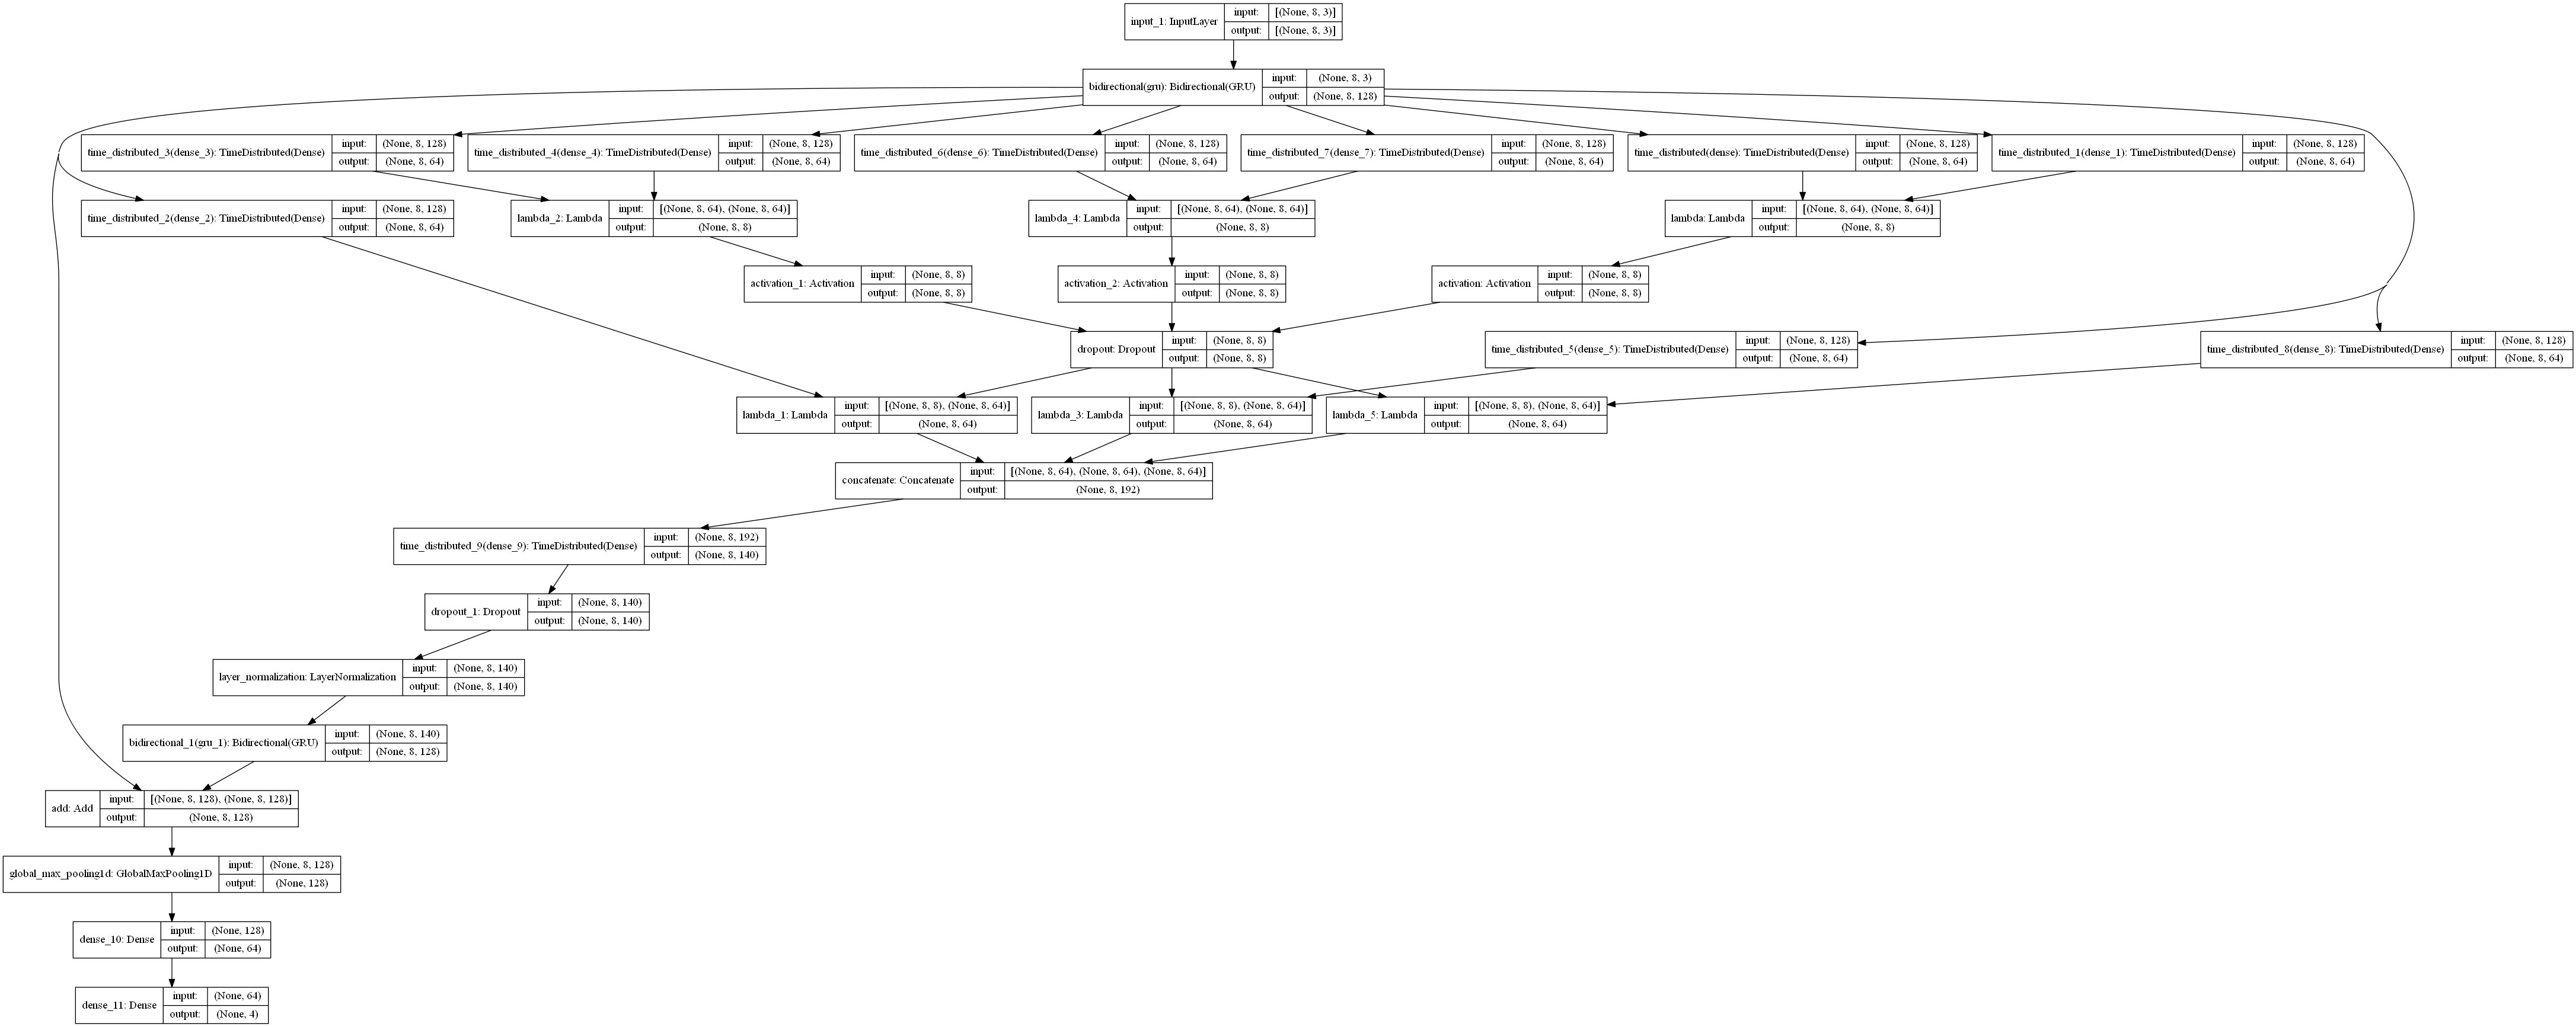

In [10]:
def build_model():
    inp = Input(shape=(past_datapoints, 3))
    encoder = Bidirectional(GRU(64, return_sequences=True, activation = 'relu'))(inp)
    decoder, slf_attn = MultiHeadAttention(n_head=3, d_model=140, d_k=64, d_v=64, dropout=0.30)(encoder,encoder, encoder)
    decoder = Bidirectional(GRU(64, return_sequences=True,activation='relu'))(decoder)
    z = Add()([encoder,decoder])
    z = GlobalMaxPooling1D()(z)
    z = Dense(64, activation="relu")(z)
    x = Dense(future_datapoints, activation="linear")(z)

    model = Model(inputs=inp, outputs=x)
    opt = keras.optimizers.Adam(learning_rate=0.005)
    model.compile(
        loss="mean_squared_error",
        optimizer=opt)
    return model
Timeseries_transformer = build_model()
Timeseries_transformer.summary()
keras.utils.plot_model(Timeseries_transformer,"model_summary.png",show_shapes=True)

## Model training and parameters.

In [11]:
embed_size = 60
Train = 1
EPOCHS = 100  # how many passes through our data
BATCH_SIZE = 100
if Train==1:
    history=Timeseries_transformer.fit(X_train,
                        y_train,
                        batch_size=int(BATCH_SIZE),
                        epochs=int(EPOCHS),
                        verbose=1,
                        validation_data=(X_valid, y_valid),
                        callbacks=callbacks_list)
    Timeseries_transformer.save_weights("/Transformer.h5")
else:
    Timeseries_transformer.load_weights("/Transformer.h5")


Train on 9600 samples, validate on 2400 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
9600/9600 [==============================] - 7s 748us/sample - loss: 0.0779 - val_loss: 0.0210

In [12]:
pred_test = Timeseries_transformer.predict(X_test)
y_pred = pred_test*max[0]
y_test1 = y_test*max[0]

In [13]:
from itertools import chain
def make_linear(y_pred_951,future_datapoints):
    lin1 = np.asmatrix(y_pred_951)
    factor2 = len(lin1)
    lowerloop2 = round((factor2/future_datapoints))
    lin2 = []
    for i in range (lowerloop2):
            holder2 = lin1[:][i*future_datapoints]
            lin2.append(holder2.tolist()[0])

    lin3 = list(chain.from_iterable(lin2))
    lin3 = np.array(lin3)
    return lin3
linear_test = make_linear(y_test1,future_datapoints)
linear_pred = make_linear(y_pred,future_datapoints)

In [18]:
%matplotlib qt5
plt.figure(figsize=(5, 5))
plt.plot(linear_test, 'k-', label='Test data')
plt.plot(linear_pred, 'b-', label='predicted data')
plt.title('1-hour ahead Load requirement', fontsize=12)
# plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Test samples (15 min)', fontsize=12)
plt.ylabel('Load (kWh)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()